# Using imgui bundle scatter widget

In [2]:
# cf  https://www.youtube.com/watch?v=STPv0jSAQEk&list=PLSIzlWDI17bS025ph6R0W_3RKM0qJ3qoO&index=4

# %pip install imgui_bundle

### Import dependencies

In [2]:
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pylab as plt 
import numpy as np
import ipywidgets

# Specific imports for the scatter_widget_bundle
from scatter_widget_bundle import ScatterData, ScatterPresenter
from imgui_bundle import immapp


### Create the scatter data

In [10]:
scatter_data = ScatterData.make_default()

### Edit the scatter data

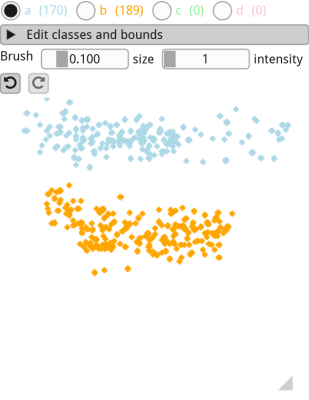

In [12]:
from imgui_bundle import immapp
scatter_presenter = ScatterPresenter(scatter_data)
immapp.run_nb(scatter_presenter.gui, thumbnail_height=400)

### Draw the decision boundary

<Figure size 1200x1200 with 0 Axes>

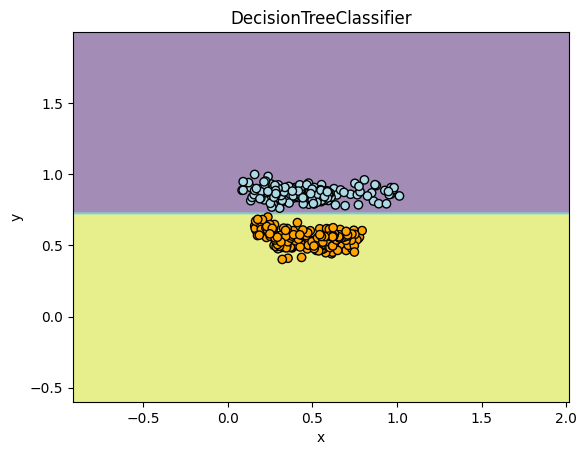

In [13]:
def show_plot():
    df = scatter_data.data_as_pandas()
    if len(df) and (df['color'].nunique() > 1):
        X = df[['x', 'y']].values
        y = df['color']
        display(HTML("<br><br><br>"))
        fig = plt.figure(figsize=(12, 12));
        classifier = DecisionTreeClassifier().fit(X, y)
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier, X, 
            response_method="predict_proba" if len(np.unique(df['color'])) == 2 else "predict",
            xlabel="x", ylabel="y",
            alpha=0.5,
        );
        disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k");
        plt.title(f"{classifier.__class__.__name__}");
        plt.show();

show_plot()

## Show the scatter data as pandas dataframe

In [14]:
scatter_data.data_as_pandas()

,x,y,class,color
0,0.593274,0.815519,a,#add8e6
1,0.570638,0.817785,a,#add8e6
2,0.524965,0.859351,a,#add8e6
3,0.510870,0.835232,a,#add8e6
4,0.491515,0.880864,a,#add8e6
...,...,...,...,...
354,0.176300,0.569126,b,#ffa500
355,0.177455,0.682654,b,#ffa500
356,0.186917,0.571476,b,#ffa500
357,0.263238,0.619518,b,#ffa500
